# Python Analytics Assignment
**Submitted by:** Maxim Neaga

# Imports

- pandas: for data manipulation functionality
- numpy: for series and numerical functionality
- matplotlib: for visualizations

In [319]:
import numpy as np
import pandas as pd

# Magic for displaying graphs and charts
%matplotlib inline

# Excercise 1: Loading and cleaning data (5%)

In this exercise, we'll load the data and drop a few weird columns.

## 1. Load the food facts dataset FoodFacts.csv into a pandas dataframe

Simply trying to read the CSV file will result in a warning, since some of the columns have mixed type data

In [320]:
food_facts = pd.read_csv('FoodFacts.csv')

/home/maxneaga/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Setting low_memory=False suppresses the warning:

In [321]:
food_facts = pd.read_csv('FoodFacts.csv', low_memory=False)
food_facts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,000000000000012866,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1447004364,2015-11-08T17:39:24Z,1447004364,2015-11-08T17:39:24Z,Poêlée à la sarladaise,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. What are columns 0, 3, 5, 27 and 36?

In [322]:
[food_facts.columns[0],
food_facts.columns[3],
food_facts.columns[5],
food_facts.columns[27],
food_facts.columns[36]]

['code', 'created_t', 'last_modified_t', 'cities', 'allergens_en']

## 3. Remove columns 3, 5

The columns 0 through 6 before removal are

In [323]:
food_facts.columns[:7]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime'],
      dtype='object')

Now, let's remove columns 3 and 5 and verify the new columns 0 through 6

In [324]:
food_facts = food_facts.drop(food_facts.columns[[3,5]], axis=1)
food_facts.columns[:7]

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'generic_name'],
      dtype='object')

# Exercise 2: Exploring the Data (20%)

## 1. What percentage of items have a nutrition_score for the UK?

First, let's find columns that contain "nutrition_score" in the title to find the one for UK

In [325]:
food_facts[food_facts.columns[food_facts.columns.str.startswith('nutrition_score')]].columns

Index(['nutrition_score_fr_100g', 'nutrition_score_uk_100g'], dtype='object')

Now we see that our column of interest is "nutrition_score_uk_100g", so we can find the percentage of all not null values

In [326]:
food_facts.nutrition_score_uk_100g.notnull().mean() * 100

47.774911072775296

## 2. What's the most caffeinated food?

Same here, let's find the column that contains the caffeine level first

In [327]:
food_facts[food_facts.columns[food_facts.columns.str.startswith('caffein')]].columns

Index(['caffeine_100g'], dtype='object')

We see that it is "caffeine_100g". Now let's find the row that contains the maximum caffeine value

In [328]:
food_facts.loc[food_facts.caffeine_100g == food_facts.caffeine_100g.max()][['product_name', 'caffeine_100g']]

,product_name,caffeine_100g
8861,Red Bull energy drink,32.0


Red Bull is the winner!

## 3. What items (top 5) have a lot of arachidonic acid (arachidonic_acid_100g)?

In [329]:
top5_arachidonic_acid = food_facts.sort_values(by='arachidonic_acid_100g', ascending=False).head(5)
top5_arachidonic_acid[['product_name', 'arachidonic_acid_100g']]

,product_name,arachidonic_acid_100g
12756,Lait Gallia Calisma,0.090
32423,Dès la naissance,0.082
55289,Dès la naissance,0.064
54897,Nidal Natéa 2,0.044
12835,Gallia croissance,0.007


## 4. Based on the data, what would you guess arachidonic acid is used for? (check the categories)

First let's find all columns that relate to the categories (start with "cat"). The let's see what our items of interest contain in them

In [330]:
columns = food_facts[food_facts.columns[food_facts.columns.str.startswith('cat')]].columns
top5_arachidonic_acid[columns]

,categories,categories_tags,categories_en
12756,"Aliments pour bébé,Laits pour bébé,Laits 1er â...","en:baby-foods,en:baby-milks,en:infant-formulas...","Baby foods,Baby milks,Infant formulas,fr:Lait-..."
32423,Laits 1er âge,"en:baby-foods,en:baby-milks,en:infant-formulas","Baby foods,Baby milks,Infant formulas"
55289,"Aliments pour bébé,Laits pour bébé,Laits 1er âge","en:baby-foods,en:baby-milks,en:infant-formulas","Baby foods,Baby milks,Infant formulas"
54897,"Laits 2ème âge,Aliments pour bébé,Dès 06 mois,...","en:baby-foods,en:baby-milks,en:from-6-months,f...","Baby foods,Baby milks,From 6 months,fr:Laits 2..."
12835,Laits de croissance,"en:baby-foods,en:baby-milks,fr:laits-de-croiss...","Baby foods,Baby milks,fr:Laits de croissance"


Looks like some baby food additive

## 5. Make a box plot of the nutritional score for the uk (nutrition_score_uk_100g).

Remove NaN values first

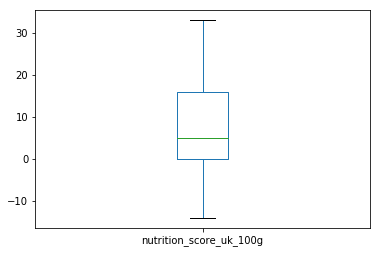

In [331]:
food_facts_nona = food_facts.nutrition_score_uk_100g.dropna()
food_facts_nona.plot.box()

## 6. Do you think there are more healthy or unhealthy foods in this data set? Is the data skewed? Explain.

One way to find this out is to compare the mean food score across all records with the median value. From the box plot, we can see that it is below the mean, but let's verify:

In [332]:
food_facts_nona.mean()

7.68719243305426

In [333]:
food_facts_nona.median()

5.0

# Exercise 3: Who's Creating the Data? (30%)

Explore the "creator" column

In [334]:
food_facts.creator.head(10)

0               date-limite-app
1               date-limite-app
2                       tacinte
3                       tacinte
4                      teolemon
5                      bcatelin
6                       sigoise
7                      teolemon
8                      sebleouf
9    openfoodfacts-contributors
Name: creator, dtype: object

## 1. How many unique creators are there in the data?

We will not count the NAs

In [335]:
food_facts.creator.dropna().unique().size

1905

## 2. What percentage of items are created by open food facts contributers?

In [336]:
(food_facts[['creator']] == 'openfoodfacts-contributors').mean() * 100

creator    24.142406
dtype: float64

Alternatively, we can achieve the same result using `groupby`. First count all food facts created by 'openfoodfacts-contributors'

In [337]:
food_fact_creators = food_facts.groupby('creator')
food_facts_created_by_offc = food_fact_creators.creator.count()['openfoodfacts-contributors']
food_facts_created_by_offc

15814

Then use it to calculate the percentage:

In [338]:
food_facts_nona = food_facts.creator.dropna()
(food_facts_created_by_offc / food_facts_nona.size) * 100

24.167494460151296

## 3. Find the top 10 creators

We can use our "groupby creator" object from the previous question to get the count of occurences. Then apply `nlargest` function to the series to get the top 10 creators

In [339]:
top_food_creators = food_fact_creators.creator.count().nlargest(10)
top_food_creators

creator
openfoodfacts-contributors    15814
tacite                         4452
date-limite-app                3980
sebleouf                       3260
tacinte                        3189
javichu                        2544
stephane                       2367
jeanbono                       1721
miles67off                     1406
teolemon                       1277
Name: creator, dtype: int64

## 4. Create a bar plot of the number of contributions by each creator for the top 10 creators

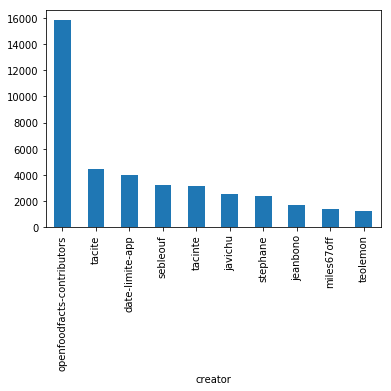

In [340]:
top_food_creators.plot.bar()

# Exercise 4: Modeling (30%)

Here we'll poke at the question "Is there good fat?"

## 1. Create a dataframe with only two columns "fat_100g" and "nutrition_score_uk_100g" (drop nulls)

In [341]:
fat_and_score = food_facts[['fat_100g', 'nutrition_score_uk_100g']].dropna()
fat_and_score.head()

,fat_100g,nutrition_score_uk_100g
10,7.0,10.0
11,7.0,10.0
13,0.0,2.0
16,0.0,2.0
22,0.0,14.0


## 2. Create a scatter plot with x being "fat_100g" and y being "nutrition_score_uk_100g"

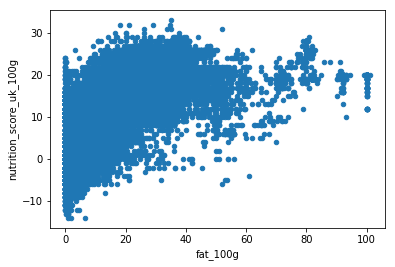

In [342]:
fat_and_score.plot.scatter(x='fat_100g', y='nutrition_score_uk_100g')

## 3. Split the data into two random sets test and train (70% train, 30% test)

In [343]:
mask = np.random.rand(len(fat_and_score)) < 0.7
train = fat_and_score[mask]
test = fat_and_score[~mask]

## 4. Fit a linear regression on the train dataset using x as "fat_100g" and y as "nutrition_score_uk_100g"

In [344]:
from sklearn.linear_model import LinearRegression
x_train = train[['fat_100g']]
y_train = train['nutrition_score_uk_100g']
model = LinearRegression().fit(x_train,y_train)

## 5. Predict nutrition score using the test set

Use the trained model to see how well it performs against the test data

In [345]:
x_test = test[['fat_100g']]
y_test = test['nutrition_score_uk_100g']
predicted = model.predict(x_test)
model.score(x_test, y_test)

0.43962394690225071

With the score being out of 1.0, looks like our model provides correct prediction in 1 in 2 cases, and is not reliable.

## 6. Plot the scatter plot and line together

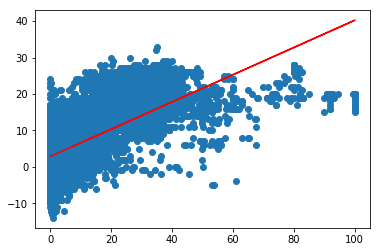

In [346]:
from matplotlib import pyplot as plt
plt.scatter(test['fat_100g'], test['nutrition_score_uk_100g'])
plt.plot(test['fat_100g'], predicted, color='red')

## 7. Do the results suprise you? What types of items have a lot of fat? Do they have high nutrition scores?

The results are expected, as there is no direct (linear) correlation between the fat concentration and nutritional value.

We can see what categories of food items have most fat

In [347]:
fat_score_category = food_facts[['product_name', 'fat_100g', 'nutrition_score_uk_100g', 'categories_en']].dropna()
fat_score_category.nlargest(20, 'fat_100g')

,product_name,fat_100g,nutrition_score_uk_100g,categories_en
683,Virgin coconut oil,100.0,20.0,"Plant-based foods and beverages,Plant-based fo..."
4191,Huile d'Olive Vierge Extra Classico,100.0,20.0,"Plant-based foods and beverages,Plant-based fo..."
4247,extra virgin cocos,100.0,15.0,"Plant-based foods and beverages,Plant-based fo..."
9462,Jog'Frit,100.0,20.0,"Plant-based foods and beverages,Plant-based fo..."
9465,huile de tournesol,100.0,20.0,"Plant-based foods and beverages,Plant-based fo..."
13295,Huile de Tournesol,100.0,20.0,"Plant-based foods and beverages,Plant-based fo..."
13806,Huile de tournesol,100.0,20.0,"Plant-based foods and beverages,Plant-based fo..."
13807,Huile de tournesol,100.0,20.0,"Plant-based foods and beverages,Plant-based fo..."
17016,Graisse de canard,100.0,20.0,"Fats,Animal fats,Duck fat"
17382,Graisse de canard,100.0,20.0,"Fats,Animal fats,Duck fat"


We see that these are mostly plant-based foods, such as oils. They generally have the highest nutrition scores (at least according to the UK data).

# Exercise 5: Machine Learning Theory (15%)

## 1. If you were going to create your own nutritional rating, based off of (the very incomplete) UK and French rankings which class of machine learning model would you choose? Why? Which scikit learn model would you choose? Why? Assume your rating would be between 0 and 100.

I would use a supervised learning model, Multiple Linear Regression. The nutritional raing is a mapping function *y=f(x)* with multiple variables (ingredients) serving as the predictors.

For scikit-learn, I would use one of the regression models. The cheat-sheet on http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html supports this decision based on the data available and our analysis intent.

## 2. If you wanted to group foods into 10 categories based on their nutritional facts and keywords in their product names, which type of machine learning model would you use? Why? Which scikit learn model would you choose? Why?

Since we want to discover the inherent groupings in the data, I would use an unsupervised, clustering model; I would start with k-means clustering.

The scikit selection guide recommends selecting Mini Batch K-Means method, to reduce the computation time on a large data set (> 10k), while providing a very similar result to k-means.

## 3. If you wanted to try to detect outliers (malicious users, data corruption, etc) what type of model could you use? Why? Is there anything in scikit learn that can handle this task?

scikit provides a set of tools for outliers detection: http://scikit-learn.org/stable/modules/outlier_detection.html What model to use highly depends on the charasteristics of data that we want to detect the outliers in. This is demonstrated in the section where One-class SVM, Isolation Forest, LOF, and Elliptic Envelope are compared (at the bottom of the page). The general idea here is to define a "shape" where most data fits and find those that fall outside its boundaries.